<a href="https://colab.research.google.com/github/Sahithi419/AI-PROJECT1/blob/main/hatespeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skipping, found downloaded files in "./hate-speech-and-offensive-language-dataset" (use force=True to force download)
accuracy is:  0.7966782748459684


Epoch 1/9
273/273 [==============================] - ETA: 0s - loss: 0.5777 - accuracy: 0.8168
Epoch 1: val_accuracy improved from -inf to 0.87477, saving model to ./model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


273/273 [==============================] - 150s 531ms/step - loss: 0.5777 - accuracy: 0.8168 - val_loss: 0.3930 - val_accuracy: 0.8748 - lr: 0.0010
Epoch 2/9
273/273 [==============================] - ETA: 0s - loss: 0.3195 - accuracy: 0.9009
Epoch 2: val_accuracy improved from 0.87477 to 0.88374, saving model to ./model.h5
273/273 [==============================] - 140s 512ms/step - loss: 0.3195 - accuracy: 0.9009 - val_loss: 0.3540 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 3/9
273/273 [==============================] - ETA: 0s - loss: 0.2147 - accuracy: 0.9336
Epoch 3: val_accuracy improved from 0.88374 to 0.88428, saving model to ./model.h5
273/273 [==============================] - 139s 510ms/step - loss: 0.2147 - accuracy: 0.9336 - val_loss: 0.3972 - val_accuracy: 0.8843 - lr: 0.0010
Epoch 4/9
273/273 [==============================] - ETA: 0s - loss: 0.1603 - accuracy: 0.9571
Epoch 4: val_accuracy did not improve from 0.88428
273/273 [==============================] - 141s 516ms/

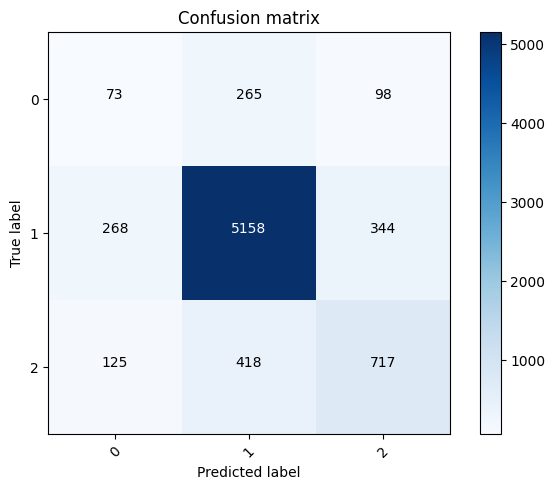

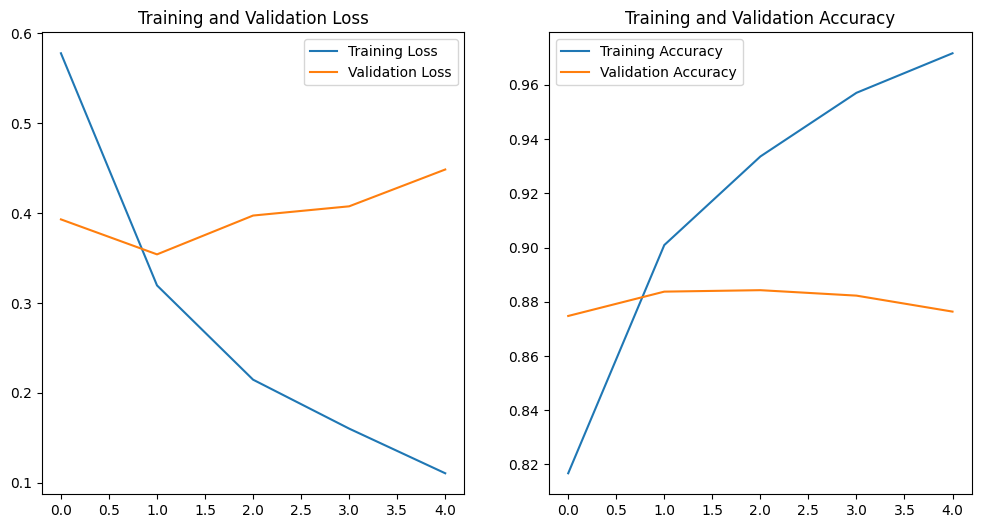

1/1 [==============================] - 0s 284ms/step
Predicted class is 1


In [9]:
!pip install opendatasets
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data"
od.download(dataset_url)
import pandas as pd

df = pd.read_csv('/content/kusuma.csv')
df.head()

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from joblib import dump, load

text = []
clas = []
text = df['tweet'].tolist()
clas = df['class'].tolist()

# dataframe for text preprocessing
df = pd.DataFrame({'tweet': text, 'class': clas})
# convert data to lowecase
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

# bow for final data preparation
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib')

from keras.utils import to_categorical

# Convert labels to categorical format
# y_train = to_categorical(y_train, num_classes=3, dtype='float32')
# y_test = to_categorical(y_test, num_classes=3, dtype='float32')

from keras.utils import to_categorical

# Convert labels to categorical format
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle
# Tokenize and pad the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])

max_sequence_length = 100

X_train_padded = pad_sequences(sequences, maxlen=max_sequence_length)

tokenizer_path = 'tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_padded, y, test_size=0.3, stratify=y, random_state=42)

from keras.regularizers import l2
from keras.layers import Dropout

# Create the model with L2 regularization and dropout
model = Sequential()
model.add(Embedding(232337, 100, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping and learning rate reduction callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the number of epochs as an integer
epochs = 9
from keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath="./model.h5",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)
from keras.callbacks import ReduceLROnPlateau

# Define ReduceLROnPlateau callback
reduce_learning_rate = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

# Fiting the model using the encoded labels and callbacks
history = model.fit(X_train, y_train_encoded,
                    validation_data=(X_test, y_test_encoded),
                    epochs=int(epochs),  # Ensure epochs is an integer
                    batch_size=batch_size,
                    callbacks=[early_stop, model_checkpoint, reduce_learning_rate])





# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


model.save('model.h5')

import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'[^a-zA-Z0-9\s]', '', processed_text)
    return processed_text

text = df['tweet'].tolist()
clas = df['class'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

df['tweet'] = df['tweet'].apply(lambda x: preprocess_text(x))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])

max_sequence_length = 100

X_train = pad_sequences(sequences, maxlen=max_sequence_length)

tokenizer_path = 'tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)







!pip install librosa

from IPython.display import Audio, display
import librosa

audio_file_path = '/content/mixkit-alert-alarm-1005.wav'

audio_data, sample_rate = librosa.load(audio_file_path, sr=None)

alarm_sound = Audio(data=audio_data, rate=sample_rate, autoplay=True)

new_text = " hateful message."
processed_text = preprocess_text(new_text)
sequence = tokenizer.texts_to_sequences([processed_text])
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)

import numpy as np

# Assuming prediction is the variable containing the prediction output

if np.argmax(prediction) == 1:
    # Do something if the predicted class is 1
    # For instance:
    print("Predicted class is 1")
    display(alarm_sound)
    # Add your actions here
elif np.argmax(prediction) == 0:
    # Do something if the predicted class is 0
    # For instance:
    print("Predicted class is 0")
    # Add your actions here, like displaying an alarm sound
    display(alarm_sound)





In [83]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'[^a-zA-Z0-9\s]', '', processed_text)
    return processed_text

text = df['tweet'].tolist()
clas = df['class'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

df['tweet'] = df['tweet'].apply(lambda x: preprocess_text(x))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])

max_sequence_length = 100

X_train = pad_sequences(sequences, maxlen=max_sequence_length)

tokenizer_path = 'tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)







In [84]:



!pip install librosa

from IPython.display import Audio, display
import librosa

audio_file_path = '/content/mixkit-alert-alarm-1005.wav'

audio_data, sample_rate = librosa.load(audio_file_path, sr=None)

alarm_sound = Audio(data=audio_data, rate=sample_rate, autoplay=True)

new_text = "ice-cream"
processed_text = preprocess_text(new_text)
sequence = tokenizer.texts_to_sequences([processed_text])
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)

import numpy as np

# Assuming prediction is the variable containing the prediction output

if np.argmax(prediction) == 1:
    # Do something if the predicted class is 1
    # For instance:
    print("Predicted class is 1")
    display(alarm_sound)
    # Add your actions here
elif np.argmax(prediction) == 0:
    # Do something if the predicted class is 0
    # For instance:
    print("Predicted class is 0")
    # Add your actions here, like displaying an alarm sound
    display(alarm_sound)
elif np.argmax(prediction) == 2:
  print("no hate speech")

1/1 [==============================] - 0s 50ms/step
no hate speech


In [51]:
!pip install SpeechRecognition
!pip install soundfile
!pip install librosa

!pip install pydub
from pydub import AudioSegment
from pydub.playback import play


In [85]:
import speech_recognition as sr
import soundfile as sf
import librosa
import re
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pickle
from pydub import AudioSegment
from pydub.playback import play

def play_alarm():
    alarm_sound = AudioSegment.from_wav('/content/mixkit-alert-alarm-1005.wav')  # Replace with your alarm sound file path
    play(alarm_sound)



# Function to convert audio to text
def audio_to_text(audio_path):
    recognizer = sr.Recognizer()
    audio_data, sample_rate = librosa.load(audio_path, sr=None)
    audio_file = 'temp.wav'
    sf.write(audio_file, audio_data, sample_rate)
    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)
        text = recognizer.recognize_google(audio)
        return text

# Preprocess the text similar to what you did before training the hate speech detection model
def preprocess_text(text):
    processed_text = text.lower()
    processed_text = re.sub(r'[^a-zA-Z0-9\s]', '', processed_text)
    return processed_text

# Load tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Path to your trained model
model = load_model('/content/lstm.h5')

# Path to the audio file
audio_path = '/content/WhatsApp Audio 2023-12-10 at 7.54.59 PM.wav'  # Replace with your audio file path

# Convert audio to text
audio_text = audio_to_text(audio_path)
print("Audio converted to text:", audio_text)

import IPython.display as ipd


# Preprocess the text
processed_text = preprocess_text(audio_text)

# Tokenize and pad the input text
max_sequence_length = 100
sequence = tokenizer.texts_to_sequences([processed_text])
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

# Make prediction using your model
prediction = model.predict(padded_sequence)
from IPython.display import Audio, display

# Function to play the warning alert sound
def play_warning_alert():
    warning_alert = Audio('/content/mixkit-alert-alarm-1005.wav', autoplay=True)  # Replace with the path to your warning alert sound file
    return warning_alert

# ... (existing code)

# Assuming prediction is the variable containing the prediction output
if np.argmax(prediction) == 1:
    print("Predicted class is 1 - Likely Hate Speech")

    # Play warning alert for detected hate speech
    warning = play_warning_alert()
    display(warning)
if np.argmax(prediction) == 0:
    print("Predicted class is 0 - Likely Hate Speech")

    # Play warning alert for detected hate speech
    warning = play_warning_alert()
    display(warning)
    # Perform actions for detected hate speech
elif np.argmax(prediction) == 2:
    print("Predicted class is 2 - Not Hate Speech")




Audio converted to text: kidnap
1/1 [==============================] - 0s 369ms/step
Predicted class is 1 - Likely Hate Speech
